In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
housing=pd.read_csv('housing.csv')
housing.info()
#载入数据并快速查看数据结构
#十列数据分别为，经度，纬度，房龄中位数，总房价数，总卧室数，人口，家庭数，收入中位数，房价中位数，地理位置
#九列数据为浮点型数据，最后一列为字符串
#total_bedrooms有207个缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


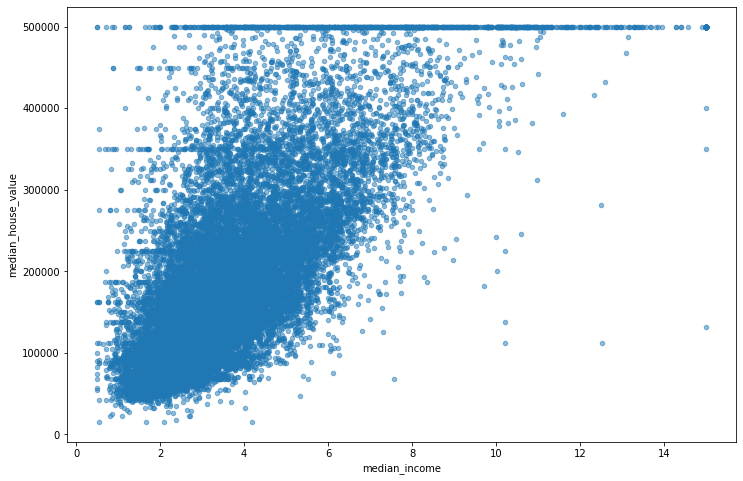

In [2]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.5,figsize=(12,8))

In [3]:
housing['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
100000.0     62
125000.0     56
67500.0      55
250000.0     47
200000.0     46
118800.0     39
450000.0     37
156300.0     35
212500.0     33
193800.0     31
181300.0     31
300000.0     30
75000.0      30
81300.0      29
55000.0      29
93800.0      29
106300.0     28
143800.0     28
400000.0     27
           ... 
373500.0      1
433000.0      1
354600.0      1
389700.0      1
370100.0      1
304200.0      1
477200.0      1
422500.0      1
445900.0      1
309000.0      1
413100.0      1
465700.0      1
353700.0      1
438900.0      1
396700.0      1
380300.0      1
478500.0      1
455300.0      1
403000.0      1
363900.0      1
494400.0      1
389800.0      1
347500.0      1
487000.0      1
331100.0      1
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value

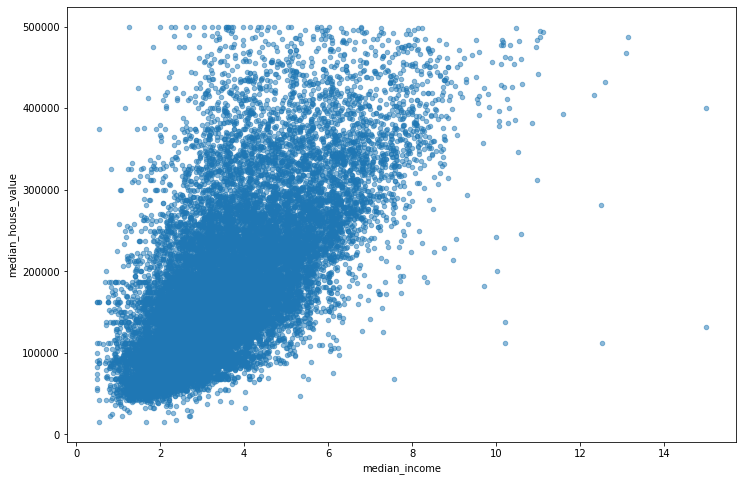

In [4]:
for i in [500001,450000,350000,275000,225000]:
    housing=housing[housing['median_house_value']!=i]
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.5,figsize=(12,8))

Skewness:0.8302234982973455
Kurtosis:0.21947597224507165


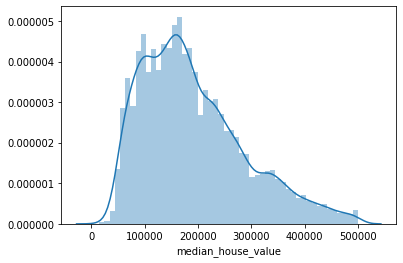

In [5]:
#查看输出，房价中位数的分布，并进行变化使其接近正态分布
sns.distplot(housing['median_house_value'])
print("Skewness:" +str(housing['median_house_value'].skew()))
print("Kurtosis:" +str(housing['median_house_value'].kurt()))

Skewness:-0.28261234986298905
Kurtosis:-0.36410273341166866


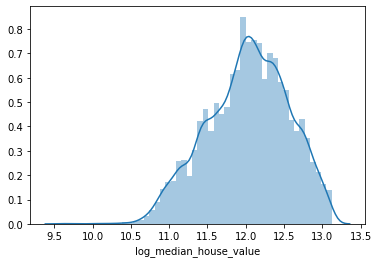

In [6]:
housing['log_median_house_value']=np.log(housing['median_house_value'])
sns.distplot(housing['log_median_house_value'])
print("Skewness:" +str(housing['log_median_house_value'].skew()))
print("Kurtosis:" +str(housing['log_median_house_value'].kurt()))

In [ ]:
housing['ocean_proximity'].value_counts()
#查看类别变量

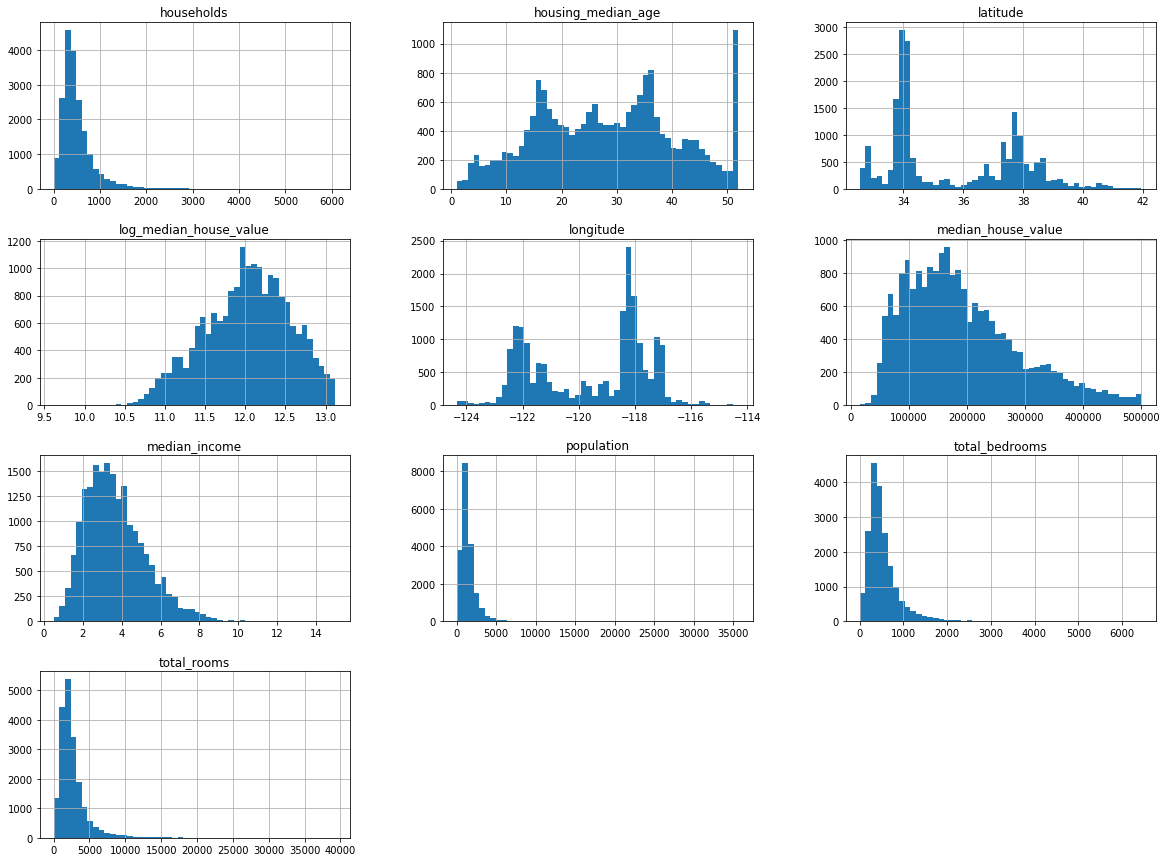

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
#查看每个数值属性变量柱状图
#房价中位数和房龄中位数有上限设置，这些数据需要暂时删除

In [8]:
housing=housing[housing['housing_median_age']!=52]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,13.022764
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,12.789684
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,12.331383
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,11.849398
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,11.974771


In [9]:
housing['log_population']=np.log(housing['population'])
housing['log_households']=np.log(housing['households'])

Skewness:4.183088108747367
Kurtosis:32.72286255761647


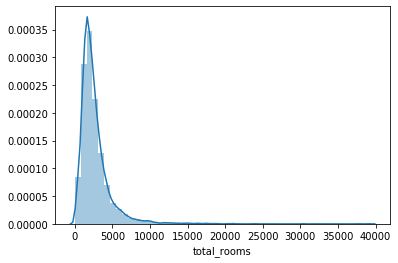

In [10]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)

sns.distplot(housing['total_rooms'])
print("Skewness:" +str(housing['total_rooms'].skew()))
print("Kurtosis:" +str(housing['total_rooms'].kurt()))

Skewness:-0.8565866243206025
Kurtosis:4.563796230451053


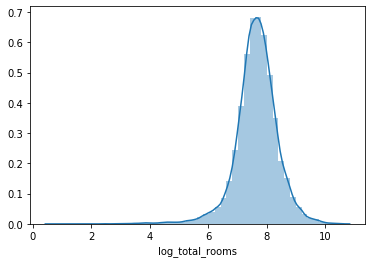

In [11]:
housing['log_total_rooms']=np.log(housing['total_rooms'])
sns.distplot(housing['log_total_rooms'])
print("Skewness:" +str(housing['log_total_rooms'].skew()))
print("Kurtosis:" +str(housing['log_total_rooms'].kurt()))

Skewness:3.46667294330767
Kurtosis:21.671590780569865


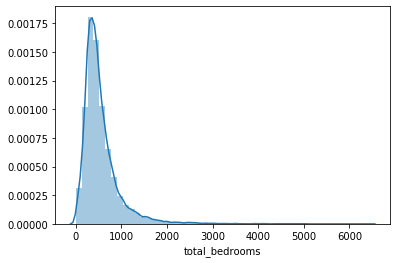

In [12]:
sns.distplot(housing['total_bedrooms'])
print("Skewness:" +str(housing['total_bedrooms'].skew()))
print("Kurtosis:" +str(housing['total_bedrooms'].kurt()))

Skewness:-0.8180984753435016
Kurtosis:4.184963320156278


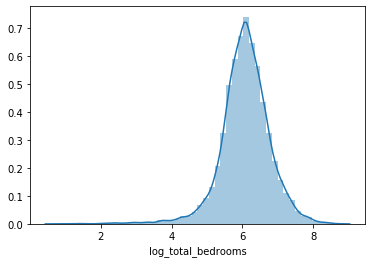

In [13]:
housing['log_total_bedrooms']=np.log(housing['total_bedrooms'])
sns.distplot(housing['log_total_bedrooms'])
print("Skewness:" +str(housing['log_total_bedrooms'].skew()))
print("Kurtosis:" +str(housing['log_total_bedrooms'].kurt()))

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_house_value,log_population,log_households,log_total_rooms,log_total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,13.022764,5.774552,4.836282,6.779922,4.859812
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,12.789684,7.783641,7.037028,8.867709,7.008505
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,12.331383,7.095064,6.388561,7.845808,6.499787
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,11.849398,6.546785,5.575949,7.021084,5.645447
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,11.974771,6.897705,6.037871,7.713785,6.120297


In [15]:
housing=pd.get_dummies(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,log_median_house_value,log_population,log_households,log_total_rooms,log_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,13.022764,5.774552,4.836282,6.779922,4.859812,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,12.789684,7.783641,7.037028,8.867709,7.008505,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,12.331383,7.095064,6.388561,7.845808,6.499787,0,0,0,1,0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,11.849398,6.546785,5.575949,7.021084,5.645447,0,0,0,1,0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,11.974771,6.897705,6.037871,7.713785,6.120297,0,0,0,1,0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = pd.DataFrame(data=housing2,
                 columns=list(housing2.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
housing2.corr()

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,log_median_house_value,log_population,log_households,log_total_rooms,log_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,13.022764,5.774552,4.836282,6.779922,4.859812,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,12.789684,7.783641,7.037028,8.867709,7.008505,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,12.331383,7.095064,6.388561,7.845808,6.499787,0,0,0,1,0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,11.849398,6.546785,5.575949,7.021084,5.645447,0,0,0,1,0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,11.974771,6.897705,6.037871,7.713785,6.120297,0,0,0,1,0


In [17]:
x_data=pd.concat([housing.loc[:,'longitude':'latitude'],housing.loc[:,'median_income'],housing.loc[:,'log_total_rooms':'ocean_proximity_NEAR OCEAN']],axis=1)
x_data.head()

,longitude,latitude,median_income,log_total_rooms,log_total_bedrooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,8.3252,6.779922,4.859812,0,0,0,1,0
1,-122.22,37.86,8.3014,8.867709,7.008505,0,0,0,1,0
8,-122.26,37.84,2.0804,7.845808,6.499787,0,0,0,1,0
15,-122.26,37.85,2.1250,7.021084,5.645447,0,0,0,1,0
18,-122.26,37.84,1.9911,7.713785,6.120297,0,0,0,1,0


In [18]:
y_data=housing.loc[:,'log_median_house_value']
y_data.head()

0     13.022764
1     12.789684
8     12.331383
15    11.849398
18    11.974771
Name: log_median_house_value, dtype: float64

In [19]:
import warnings;warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR=LinearRegression()
scores=cross_val_score(LR,x_data,y_data,cv=5)
print(scores.mean())

0.5549057391572518


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
scores=cross_val_score(gbr,x_data,y_data,cv=5)
print(scores.mean())

0.59796926987026


In [21]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
scores=cross_val_score(mlp,x_data,y_data,cv=5)
print(scores.mean())

0.5474168680245313


In [26]:
param_grid={'max_depth':[1,2,3,4,5],'learning_rate':[0.1,0.2,0.3,0.4,0.5]}
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

grid_search=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)
x_trainval, x_test, y_trainval, y_test = train_test_split(x_data, y_data, random_state=0)
grid_search.fit(x_trainval,y_trainval)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [29]:
grid_search.score(x_test,y_test)

0.8263749280344741

In [30]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.177836,0.003656,0.003601,4.898430e-04,0.1,1,"{'learning_rate': 0.1, 'max_depth': 1}",0.658257,0.684505,0.667014,0.661611,0.654772,0.665233,0.010448,25
1,0.356071,0.005442,0.005001,1.168008e-07,0.1,2,"{'learning_rate': 0.1, 'max_depth': 2}",0.725330,0.746258,0.723065,0.725906,0.716806,0.727473,0.009931,20
2,0.565913,0.006825,0.006001,1.168008e-07,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",0.760394,0.782601,0.754304,0.759679,0.754074,0.762211,0.010528,18
3,0.816963,0.007388,0.007402,4.900961e-04,0.1,4,"{'learning_rate': 0.1, 'max_depth': 4}",0.780646,0.802283,0.781401,0.787113,0.774129,0.785115,0.009520,14
4,1.117223,0.008076,0.008602,4.898624e-04,0.1,5,"{'learning_rate': 0.1, 'max_depth': 5}",0.795656,0.814366,0.793374,0.807646,0.793258,0.800861,0.008595,9
5,0.177035,0.001415,0.003401,4.900961e-04,0.2,1,"{'learning_rate': 0.2, 'max_depth': 1}",0.686019,0.713106,0.692854,0.688540,0.679763,0.692057,0.011346,24
6,0.351070,0.003634,0.005001,9.536743e-08,0.2,2,"{'learning_rate': 0.2, 'max_depth': 2}",0.758665,0.778837,0.749433,0.755345,0.749455,0.758348,0.010840,19
7,0.551310,0.006525,0.005601,4.899403e-04,0.2,3,"{'learning_rate': 0.2, 'max_depth': 3}",0.782333,0.805700,0.777148,0.787665,0.778428,0.786255,0.010390,13
8,0.792759,0.011640,0.007001,1.784161e-07,0.2,4,"{'learning_rate': 0.2, 'max_depth': 4}",0.802945,0.821197,0.799573,0.808922,0.801452,0.806818,0.007842,6
9,1.081416,0.017672,0.008002,9.536743e-08,0.2,5,"{'learning_rate': 0.2, 'max_depth': 5}",0.812278,0.825833,0.803557,0.817796,0.807900,0.813473,0.007775,1


In [35]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)